In [2]:
import pandas as pd

In [3]:
pd.set_option('display.max_rows', None)  # Satır sınırını kaldırır
pd.set_option('display.max_columns', None)  # Sütun sınırını kaldırır
pd.set_option('display.width', None)  # Konsol genişliğini sınırsız yapar

In [4]:
application = pd.read_csv('application_record.csv')
credit = pd.read_csv('credit_record.csv')

In [5]:
credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [6]:
application.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [7]:
application.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

ID: Unique Id of the row
CODE_GENDER: Gender of the applicant. M is male and F is female.
FLAG_OWN_CAR: Is an applicant with a car. Y is Yes and N is NO.
FLAG_OWN_REALTY: Is an applicant with realty. Y is Yes and N is No.
CNT_CHILDREN: Count of children.
AMT_INCOME_TOTAL: the amount of the income.
NAME_INCOME_TYPE: The type of income (5 types in total).
NAME_EDUCATION_TYPE: The type of education (5 types in total).
NAME_FAMILY_STATUS: The type of family status (6 types in total).
DAYS_BIRTH: The number of the days from birth (Negative values).
DAYS_EMPLOYED: The number of the days from employed (Negative values). This column has error values.
FLAG_MOBIL: Is an applicant with a mobile. 1 is True and 0 is False.
FLAG_WORK_PHONE: Is an applicant with a work phone. 1 is True and 0 is False.
FLAG_PHONE: Is an applicant with a phone. 1 is True and 0 is False.
FLAG_EMAIL: Is an applicant with a email. 1 is True and 0 is False.
OCCUPATION_TYPE: The type of occupation (19 types in total). This column has missing values.
CNT_FAM_MEMBERS: The count of family members.

In [8]:
application.duplicated(subset='ID').value_counts()

False    438510
True         47
Name: count, dtype: int64

In [9]:
application.drop_duplicates(subset='ID',inplace=True)
application.duplicated().value_counts()

False    438510
Name: count, dtype: int64

Duplicated Entries Removed !


In [10]:
features = application.select_dtypes(include='object').columns.tolist()

for i in features:
    print(f' {i} :  {application[i].nunique()}')
    print(application[i].unique())
    

 CODE_GENDER :  2
['M' 'F']
 FLAG_OWN_CAR :  2
['Y' 'N']
 FLAG_OWN_REALTY :  2
['Y' 'N']
 NAME_INCOME_TYPE :  5
['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']
 NAME_EDUCATION_TYPE :  5
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
 NAME_FAMILY_STATUS :  5
['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow']
 NAME_HOUSING_TYPE :  6
['Rented apartment' 'House / apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']
 OCCUPATION_TYPE :  18
[nan 'Security staff' 'Sales staff' 'Accountants' 'Laborers' 'Managers'
 'Drivers' 'Core staff' 'High skill tech staff' 'Cleaning staff'
 'Private service staff' 'Cooking staff' 'Low-skill Laborers'
 'Medicine staff' 'Secretaries' 'Waiters/barmen staff' 'HR staff'
 'Realty agents' 'IT staff']


array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'CNT_CHILDREN'}>,
        <Axes: title={'center': 'AMT_INCOME_TOTAL'}>],
       [<Axes: title={'center': 'DAYS_BIRTH'}>,
        <Axes: title={'center': 'DAYS_EMPLOYED'}>,
        <Axes: title={'center': 'FLAG_MOBIL'}>],
       [<Axes: title={'center': 'FLAG_WORK_PHONE'}>,
        <Axes: title={'center': 'FLAG_PHONE'}>,
        <Axes: title={'center': 'FLAG_EMAIL'}>],
       [<Axes: title={'center': 'CNT_FAM_MEMBERS'}>, <Axes: >, <Axes: >]],
      dtype=object)

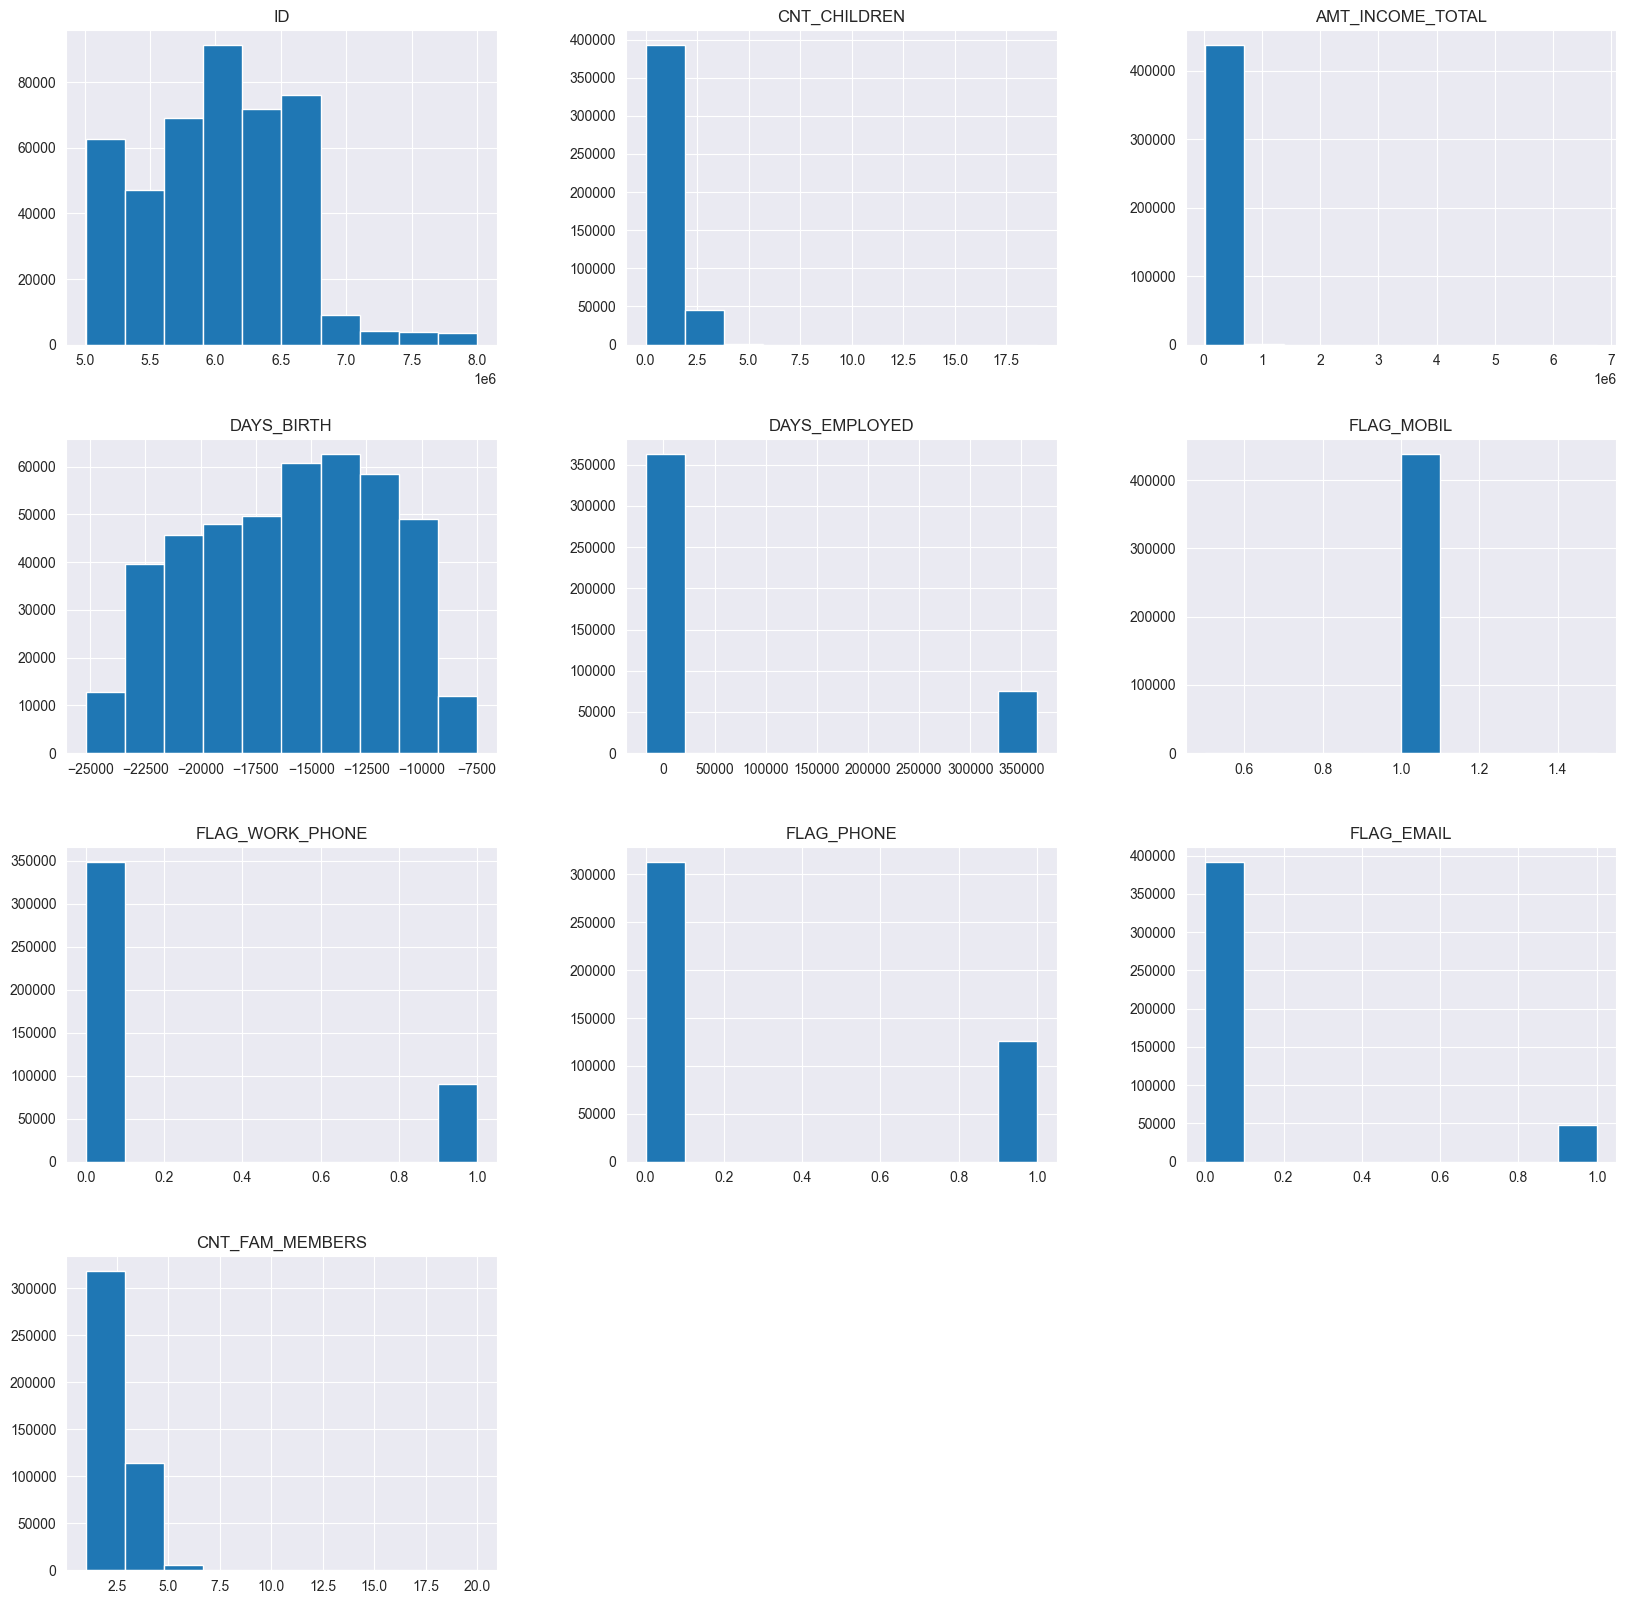

In [11]:
application.hist(figsize=(20,20))

In [12]:
application.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134193
CNT_FAM_MEMBERS             0
dtype: int64

In [13]:
application.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134193
CNT_FAM_MEMBERS             0
dtype: int64

<Axes: >

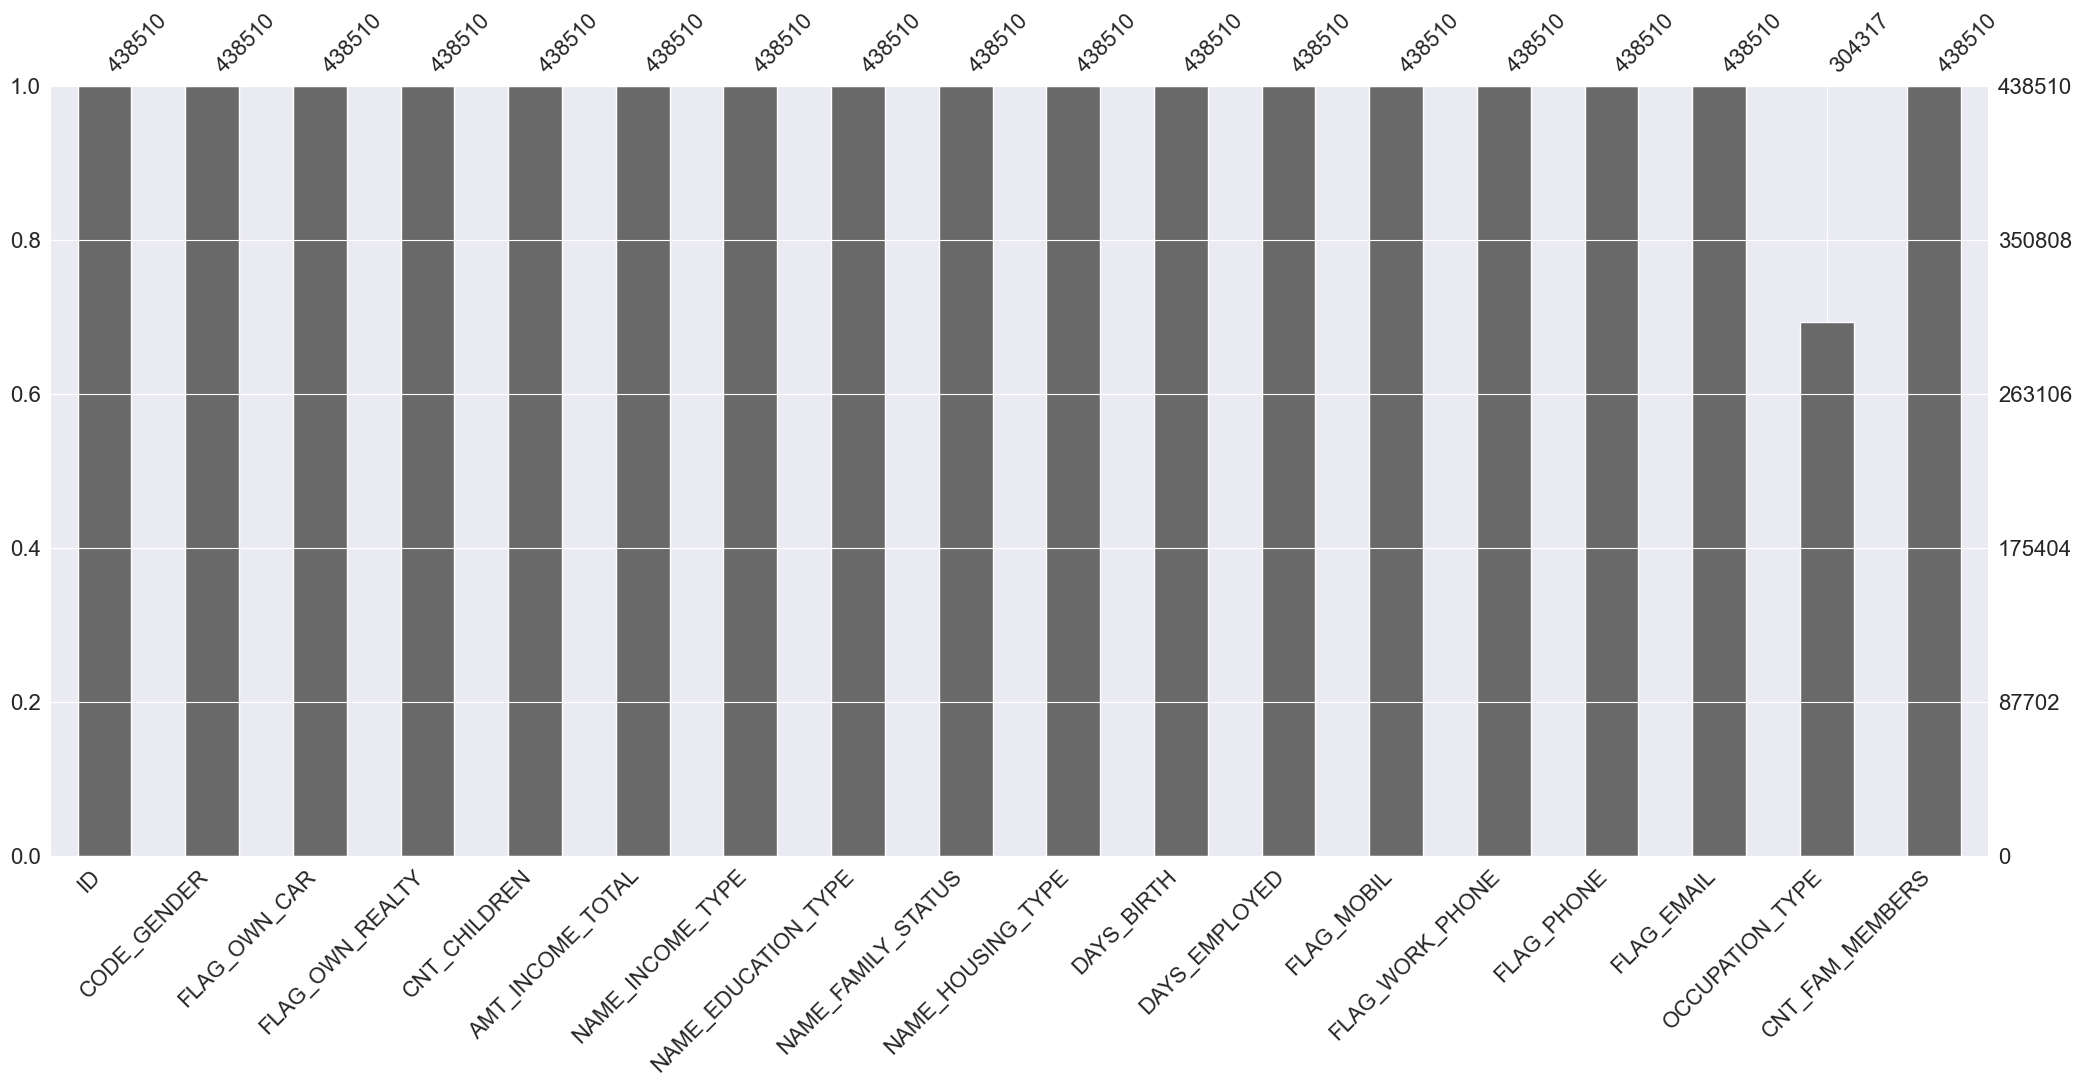

In [14]:
import missingno as msno
msno.bar(application)

In [15]:
application["OCCUPATION_TYPE"].isnull().sum()
print(application["OCCUPATION_TYPE"].isnull().sum()/len(application["ID"]) * 100 ,'%')

30.602038722035985 %


There is huge null values in Occupation Type ! It means we need go for it

In [16]:
pensioner = application["OCCUPATION_TYPE"][application["NAME_INCOME_TYPE"] == 'Pensioner']
others = application["OCCUPATION_TYPE"][application["NAME_INCOME_TYPE"] != 'Pensioner']
print(f"Percentage of nulls that are pensioners: {(pensioner.isnull().sum() / application['OCCUPATION_TYPE'].isnull().sum()) * 100} %")

print(f"Percentage of nulls that are NOT pensioners: {(others.isnull().sum() / application['OCCUPATION_TYPE'].isnull().sum()) * 100} %")


Percentage of nulls that are pensioners: 56.15196023637596 %
Percentage of nulls that are NOT pensioners: 43.84803976362404 %


In [17]:
features = application.select_dtypes(include='object').columns.tolist()

for i in features:
    print(f' {i} :  {application[i].nunique()}')
    print(application[i].unique())
    

 CODE_GENDER :  2
['M' 'F']
 FLAG_OWN_CAR :  2
['Y' 'N']
 FLAG_OWN_REALTY :  2
['Y' 'N']
 NAME_INCOME_TYPE :  5
['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']
 NAME_EDUCATION_TYPE :  5
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
 NAME_FAMILY_STATUS :  5
['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow']
 NAME_HOUSING_TYPE :  6
['Rented apartment' 'House / apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']
 OCCUPATION_TYPE :  18
[nan 'Security staff' 'Sales staff' 'Accountants' 'Laborers' 'Managers'
 'Drivers' 'Core staff' 'High skill tech staff' 'Cleaning staff'
 'Private service staff' 'Cooking staff' 'Low-skill Laborers'
 'Medicine staff' 'Secretaries' 'Waiters/barmen staff' 'HR staff'
 'Realty agents' 'IT staff']


In [18]:
df = pd.DataFrame(application[['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','OCCUPATION_TYPE']])
df.set_index(['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE'],inplace=True)
df.tail()

,,OCCUPATION_TYPE
NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,
Pensioner,Secondary / secondary special,NaN
Working,Secondary / secondary special,Laborers
Commercial associate,Higher education,Sales staff
Pensioner,Secondary / secondary special,NaN
Working,Secondary / secondary special,Sales staff


In [19]:
df.dropna(inplace=True)

In [20]:
for job in application['NAME_INCOME_TYPE'].unique():
    for edu in application['NAME_EDUCATION_TYPE'].unique():
        if job == 'Student' and edu not in ['Higher education', 'Secondary / secondary special']:
            continue
        if job == 'Pensioner' and edu not in ['Higher education', 'Secondary / secondary special', 'Incomplete higher']:
            continue
        print(f"{job}, {edu}: {df.loc[job, edu]['OCCUPATION_TYPE'].mode()[0]}")

Working, Higher education: Core staff
Working, Secondary / secondary special: Laborers
Working, Incomplete higher: Laborers
Working, Lower secondary: Laborers
Working, Academic degree: Core staff
Commercial associate, Higher education: Managers
Commercial associate, Secondary / secondary special: Laborers
Commercial associate, Incomplete higher: Managers
Commercial associate, Lower secondary: Laborers
Commercial associate, Academic degree: Sales staff
Pensioner, Higher education: Core staff
Pensioner, Secondary / secondary special: Laborers
Pensioner, Incomplete higher: High skill tech staff
State servant, Higher education: Core staff
State servant, Secondary / secondary special: Core staff
State servant, Incomplete higher: Core staff
State servant, Lower secondary: Medicine staff
State servant, Academic degree: Managers
Student, Higher education: Core staff
Student, Secondary / secondary special: Laborers


/var/folders/f3/xyc7ym6d79l0547w0nt8kz9r0000gn/T/ipykernel_16511/3630085652.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  print(f"{job}, {edu}: {df.loc[job, edu]['OCCUPATION_TYPE'].mode()[0]}")


In [21]:
#Working
aa = (application['NAME_INCOME_TYPE'] == 'Working') & (application['NAME_EDUCATION_TYPE'].isin(['Higher education', 'Academic degree']))

application.loc[aa, 'OCCUPATION_TYPE'] = application.loc[aa, 'OCCUPATION_TYPE'].fillna('Core staff')

aa  = (application['NAME_INCOME_TYPE'] == 'Working') & (application['NAME_EDUCATION_TYPE'].isin(['Secondary / secondary special', 'Incomplete higher', 'Lower secondary']))
application.loc[aa, 'OCCUPATION_TYPE'] = application.loc[aa, 'OCCUPATION_TYPE'].fillna('Laborers')

In [22]:
# Commercial associate
bb = (application['NAME_INCOME_TYPE'] == 'Commercial associate') & (application['NAME_EDUCATION_TYPE'].isin(['Higher education', 'Incomplete higher']))

application.loc[bb,'OCCUPATION_TYPE'] = application.loc[bb,'OCCUPATION_TYPE'].fillna('Managers')

bb = (application['NAME_INCOME_TYPE'] == 'Commercial associate') & (application['NAME_EDUCATION_TYPE'].isin(['Secondary / secondary special', 'Lower education']))

application.loc[bb,'OCCUPATION_TYPE'] = application.loc[bb,'OCCUPATION_TYPE'].fillna('Laborers')

bb = (application['NAME_INCOME_TYPE'] == 'Commercial associate') & (application['NAME_EDUCATION_TYPE'].isin(['Academic degree']))

application.loc[bb,'OCCUPATION_TYPE'] = application.loc[bb,'OCCUPATION_TYPE'].fillna('Sales staff')



In [23]:
#Pensioners
cc = (application['NAME_INCOME_TYPE'] == 'Pensioner') & application['NAME_EDUCATION_TYPE'].isin(['Higher education'])

application.loc[cc,'OCCUPATION_TYPE'] = application.loc[cc,'OCCUPATION_TYPE'].fillna('Core staff')

cc = (application['NAME_INCOME_TYPE'] == 'Pensioner') & application['NAME_EDUCATION_TYPE'].isin(['Secondary / secondary special'])

application.loc[cc,'OCCUPATION_TYPE'] = application.loc[cc,'OCCUPATION_TYPE'].fillna('Laborers')

cc = (application['NAME_INCOME_TYPE'] == 'Pensioner') & application['NAME_EDUCATION_TYPE'].isin(['Incomplete higher'])

application.loc[cc,'OCCUPATION_TYPE'] = application.loc[cc,'OCCUPATION_TYPE'].fillna('High skill tech staff')

In [24]:
#State Servents
dd = (application['NAME_INCOME_TYPE'] == 'State servant') & (application['NAME_EDUCATION_TYPE'].isin(['Higher education','Incomplete higher','Secondary / secondary special']))

application.loc[dd,'OCCUPATION_TYPE'] = application.loc[dd,'OCCUPATION_TYPE'].fillna('Core staff')

dd = (application['NAME_INCOME_TYPE'] == 'State servant') & (application['NAME_EDUCATION_TYPE'].isin(['Lower education']))

application.loc[dd,'OCCUPATION_TYPE'] = application.loc[dd,'OCCUPATION_TYPE'].fillna('Medicine staff')

dd = (application['NAME_INCOME_TYPE'] == 'State servant') & (application['NAME_EDUCATION_TYPE'].isin(['Academic degree']))

application.loc[dd,'OCCUPATION_TYPE'] = application.loc[dd,'OCCUPATION_TYPE'].fillna('Managers')




In [25]:
#Students
ee = (application['NAME_INCOME_TYPE'] == 'Student') & (application['NAME_EDUCATION_TYPE'].isin(['Higher education']))

application.loc[ee,'OCCUPATION_TYPE'] = application.loc[ee,'OCCUPATION_TYPE'].fillna('Core staff')

ee = (application['NAME_INCOME_TYPE'] == 'Student') & (application['NAME_EDUCATION_TYPE'].isin(['Secondary / secondary special']))

application.loc[ee,'OCCUPATION_TYPE'] = application.loc[ee,'OCCUPATION_TYPE'].fillna('Laborers')


In [26]:
application['OCCUPATION_TYPE'].isnull().sum()/application['ID'].count() * 100

0.3851679551207498

It is small piece of our data so we can fill with mode

In [27]:
application['OCCUPATION_TYPE'].isnull().sum()

1689

In [28]:
application.fillna({'OCCUPATION_TYPE': application['OCCUPATION_TYPE'].mode()[0]}, inplace=True)


In [29]:
application['OCCUPATION_TYPE'].isnull().sum()

0

In [30]:
features = application.columns.tolist()


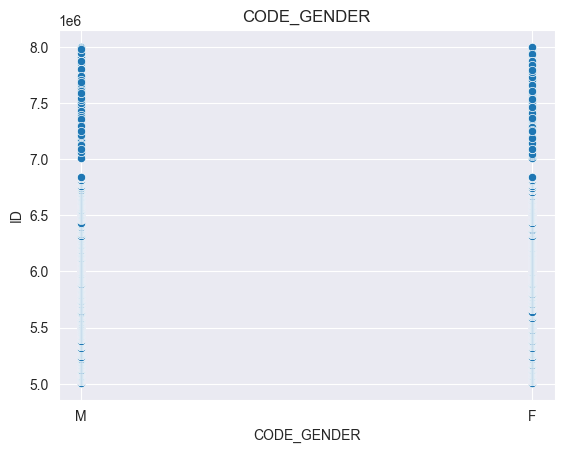

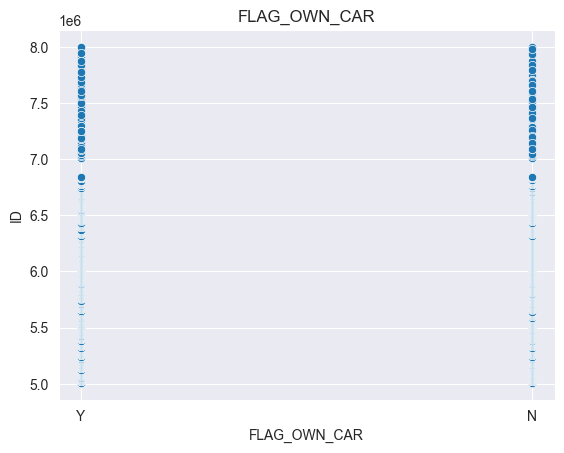

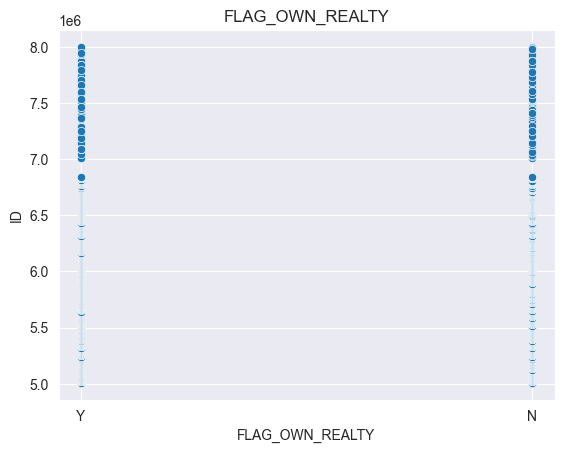

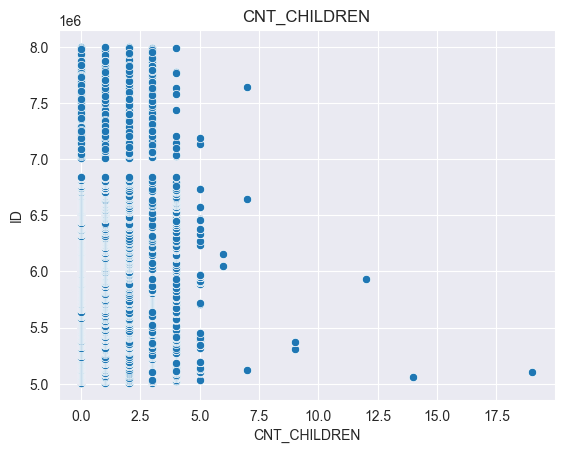

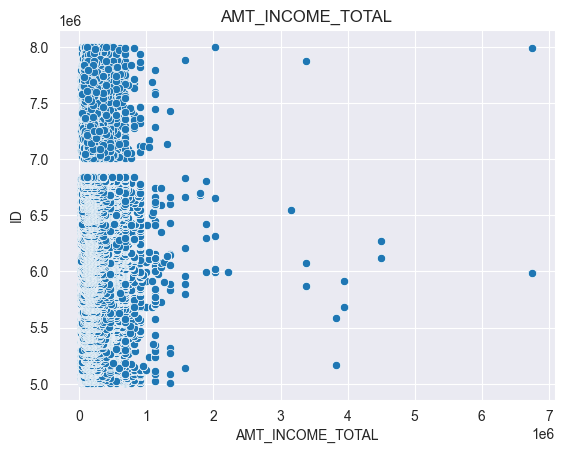

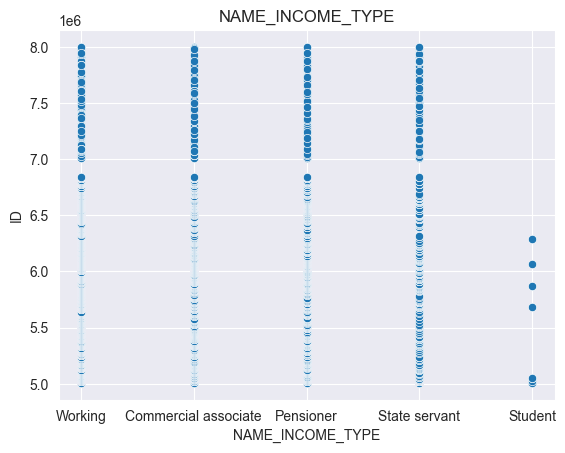

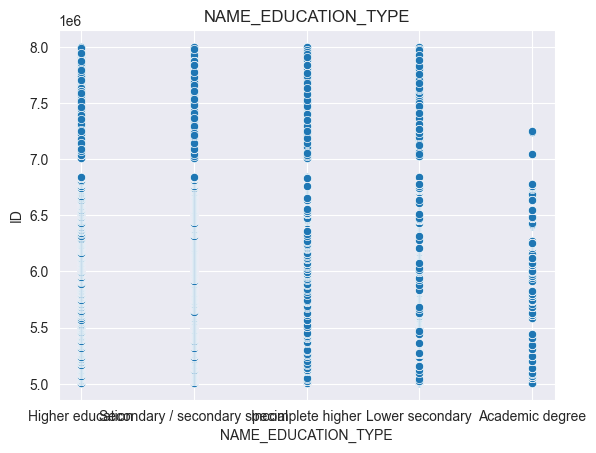

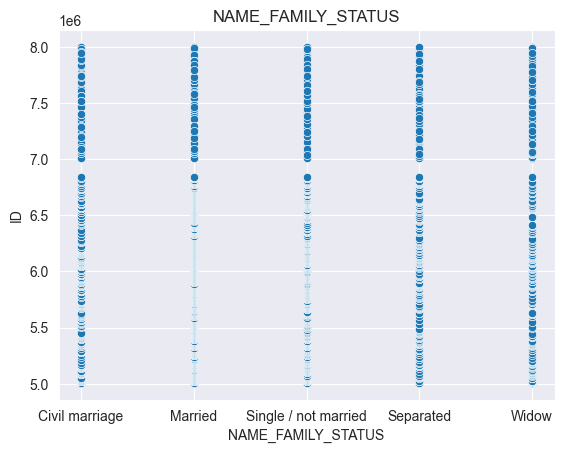

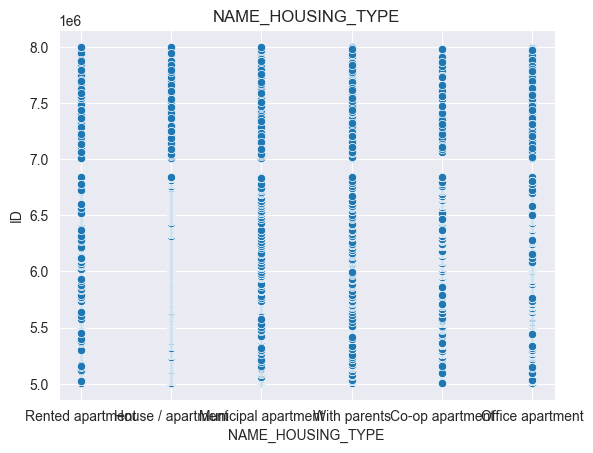

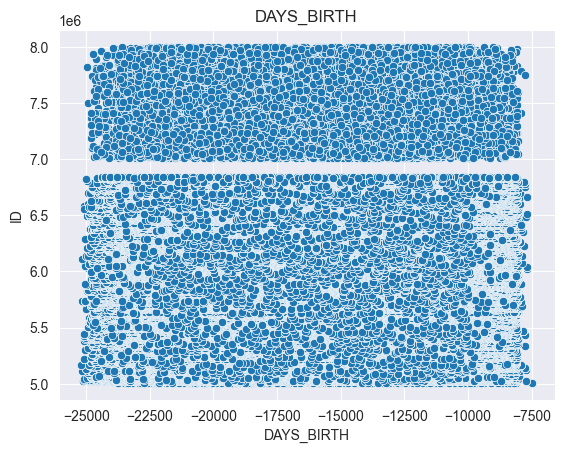

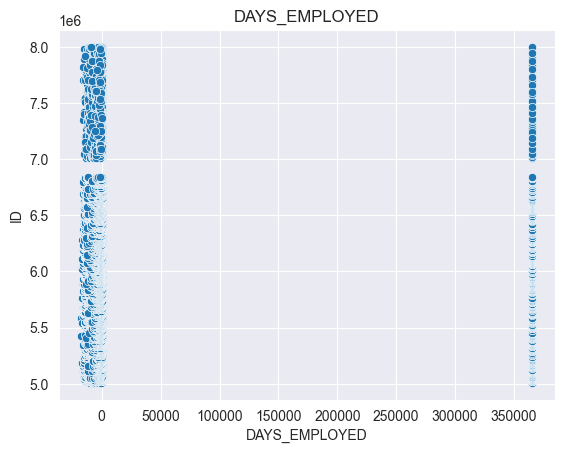

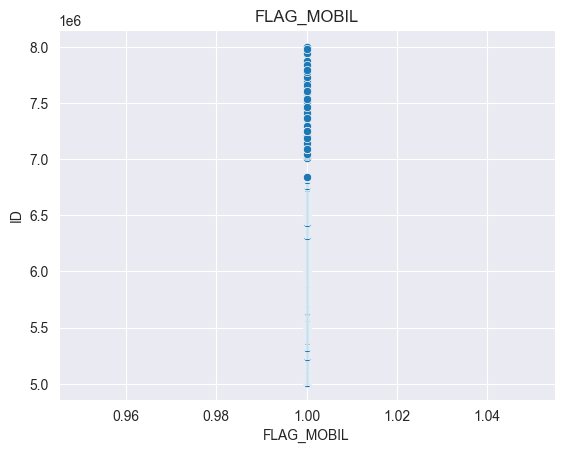

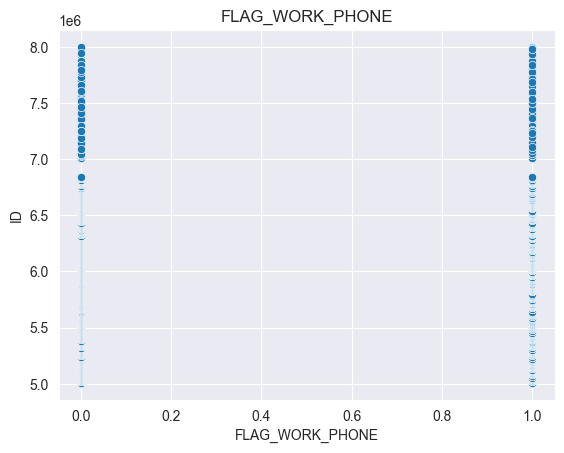

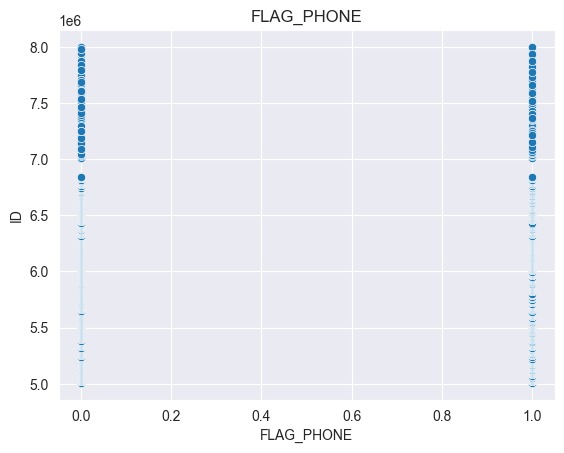

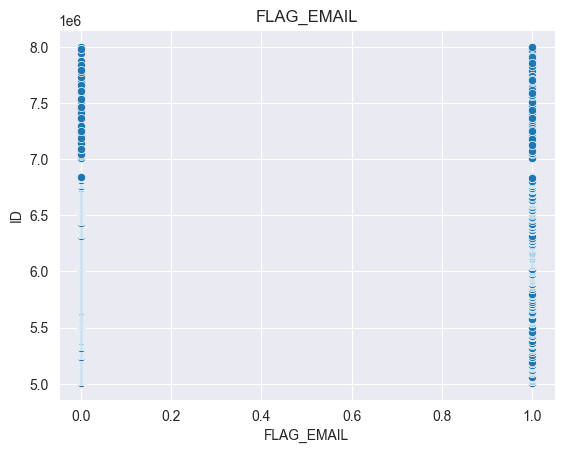

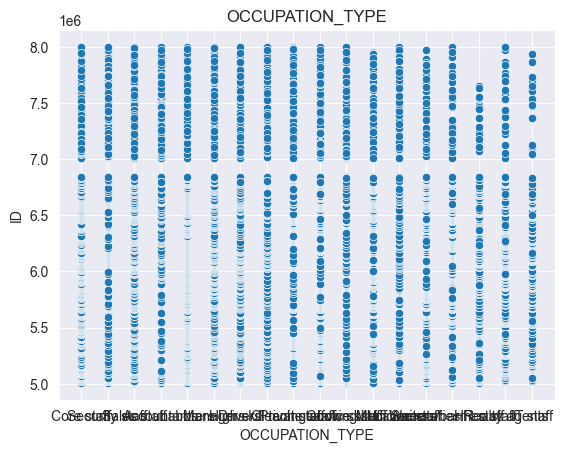

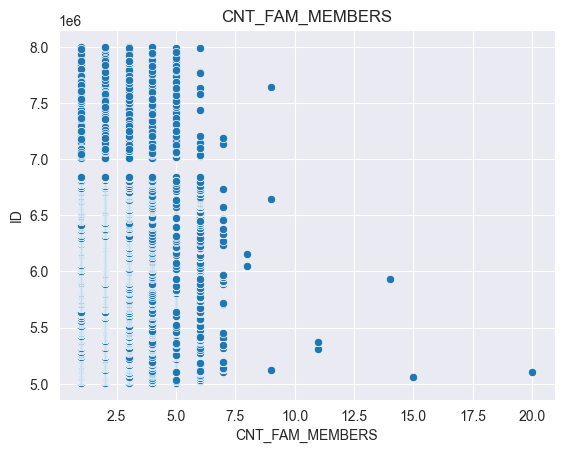

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in features:
    if i == 'ID':
        continue
    else:
        sns.scatterplot(data=application, x=i, y='ID')
        plt.title(i)
        plt.show()
        
    



It appears there are outliers in the following columns:

CNT_CHILDREN
AMT_INCOME_TOTAL
CNT_FAM_MEMBERS
we will remove those outliers.

In [32]:
# 0) Backup al
app_orig = application.copy()

# 1) Eşikleri orijinal veri üzerinden bir kere hesapla
qC_hi = app_orig['CNT_CHILDREN'].quantile(0.999)
qI_lo, qI_hi = app_orig['AMT_INCOME_TOTAL'].quantile([0.001, 0.999])
qF_lo, qF_hi = app_orig['CNT_FAM_MEMBERS'].quantile([0.001, 0.999])

# 2) Mantıklı maskeler kur
# Çocuk sayısında alttan kesme yapma (0 normal bir durum); sadece ÜST kısıt koy.
mask_children = application['CNT_CHILDREN'] <= qC_hi

# Gelir ve aile üyesi sayısında kapsayıcı (inclusive) aralık kullan
mask_income  = application['AMT_INCOME_TOTAL'].between(qI_lo, qI_hi, inclusive='both')
mask_family  = application['CNT_FAM_MEMBERS'].between(qF_lo, qF_hi, inclusive='both')

# 3) Tek seferde uygula
mask = mask_children & mask_income & mask_family
dropped = len(application) - mask.sum()

application = application.loc[mask].reset_index(drop=True)

print(f"Silinen satır: {dropped}  ({dropped/len(app_orig)*100:.2f}%)")




Silinen satır: 884  (0.20%)


In [33]:
application.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Core staff,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Core staff,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


<Axes: xlabel='CNT_CHILDREN', ylabel='ID'>

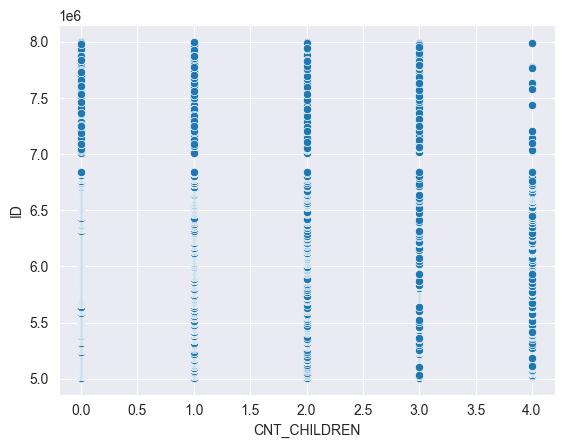

In [34]:
sns.scatterplot(data=application, x='CNT_CHILDREN', y='ID')

In [35]:
#Label Encoder Object
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
object_features = application.select_dtypes(include=['object']).columns.tolist()
object_features



['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE']

In [36]:
for i in object_features:
    application[i] = le.fit_transform(application[i])
    
application.tail()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
437621,6840104,1,0,1,0,135000.0,1,4,2,1,-22717,365243,1,0,0,0,8,1.0
437622,6840222,0,0,0,0,103500.0,4,4,3,1,-15939,-3007,1,0,0,0,8,1.0
437623,6841878,0,0,0,0,54000.0,0,1,3,5,-8169,-372,1,1,0,0,14,1.0
437624,6842765,0,0,1,0,72000.0,1,4,1,1,-21673,365243,1,0,0,0,8,2.0
437625,6842885,0,0,1,0,121500.0,4,4,1,1,-18858,-1201,1,0,1,0,14,2.0


In [37]:
credit['STATUS'].unique()

array(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype=object)

In [38]:
credit['STATUS'] = (
    credit['STATUS']
      .replace({'C': 0, 'X': 0})
      .astype(int)                              # Eğer başka harf yoksa sorun yok
      .apply(lambda x: 1 if x >= 2 else 0)
)


In [39]:
credit = credit.groupby('ID', as_index=False).agg("max")
credit.drop(columns=['MONTHS_BALANCE'], inplace=True)


In [40]:
credit['STATUS'].value_counts(normalize=True)

STATUS
0    0.985495
1    0.014505
Name: proportion, dtype: float64

In [45]:
data = pd.merge(application,credit , on='ID', how='inner')
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,3,2.0,0
1,5008805,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,3,2.0,0
2,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,1,0,0,0,16,2.0,0
3,5008808,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,14,1.0,0
4,5008809,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,1,0,1,1,14,1.0,0


In [53]:
X = data.iloc[:,1:-1]
y = data.iloc[:,-1]




In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
from xgboost import  XGBClassifier

xgb = XGBClassifier()
model = xgb.fit(X_train, y_train)
prediction = model.predict(X_test)


In [67]:
from sklearn.metrics import classification_report, accuracy_score
print(f"Accuracy: {accuracy_score(y_test, prediction) * 100:.2f}%")
print(classification_report(y_test, prediction))

Accuracy: 98.33%
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     10749
           1       0.33      0.12      0.18       161

    accuracy                           0.98     10910
   macro avg       0.66      0.56      0.59     10910
weighted avg       0.98      0.98      0.98     10910



array([[-0.70211244, -0.78497801, -1.43791747, ..., -0.31516757,
         1.71129251,  0.90551884],
       [-0.70211244, -0.78497801,  0.69545021, ..., -0.31516757,
         0.1335593 , -1.34249228],
       [-0.70211244, -0.78497801,  0.69545021, ..., -0.31516757,
        -1.18121836, -0.21848672],
       ...,
       [-0.70211244,  1.27392104, -1.43791747, ..., -0.31516757,
        -1.18121836,  4.27753552],
       [-0.70211244, -0.78497801,  0.69545021, ..., -0.31516757,
         0.92242591, -0.21848672],
       [-0.70211244,  1.27392104,  0.69545021, ..., -0.31516757,
         1.18538144,  0.90551884]])